# PreProcessing InBioMap for OmicsIntegrator

All Fraenkel-lab interactomes have been pre-processed to have 3 columns: 2 interactors and a scalar confidence
However, OmicsIntegrator requires that edges have a cost, not a confidence. This notebook sets costs on the edges and augments those interactomes for use in OmicsIntegrator.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inbiomap_exp =  pd.read_pickle("../../interactomes/InBioMap/inbiomap.9.12.2016.cleaned.namespace-mapped.exp.pickle")
inbiomap_full = pd.read_pickle("../../interactomes/InBioMap/inbiomap.9.12.2016.cleaned.namespace-mapped.full.pickle")

In [3]:
inbiomap_exp.head()

protein1 protein2 confidence
233330     A1BG   CDKN1A      0.145
233328     A1BG  ONECUT1      0.145
233329     A1BG    SHMT2      0.144
233327     A1BG     SMN1      0.145
233325     A1BG     SMN2      0.145

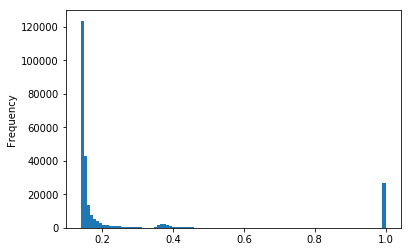

In [4]:
inbiomap_exp['confidence'].astype(float).plot.hist(bins=100)

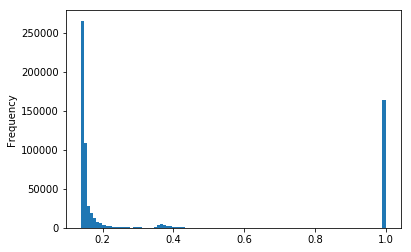

In [5]:
inbiomap_full['confidence'].astype(float).plot.hist(bins=100)

In [6]:
inbiomap_exp['cost'] = 1.5 - inbiomap_exp['confidence'].astype(float)
del inbiomap_exp['confidence']
inbiomap_full['cost'] = 1.5 - inbiomap_full['confidence'].astype(float)
del inbiomap_full['confidence']

inbiomap_exp.head()

protein1 protein2   cost
233330     A1BG   CDKN1A  1.355
233328     A1BG  ONECUT1  1.355
233329     A1BG    SHMT2  1.356
233327     A1BG     SMN1  1.355
233325     A1BG     SMN2  1.355

In [7]:
inbiomap_exp = inbiomap_exp.reset_index(drop=True)
inbiomap_full = inbiomap_full.reset_index(drop=True)

inbiomap_exp.head()

protein1 protein2   cost
0     A1BG   CDKN1A  1.355
1     A1BG  ONECUT1  1.355
2     A1BG    SHMT2  1.356
3     A1BG     SMN1  1.355
4     A1BG     SMN2  1.355

In [8]:
inbiomap_exp.to_csv('inbiomap.9.12.2016.exp.oi2', sep='\t', index=False)
inbiomap_full.to_csv('inbiomap.9.12.2016.full.oi2', sep='\t', index=False)